In [2]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [3]:
#loading dataframe
df = pd.read_csv(r'C:\Users\MainUser\Desktop\Restaurants.csv')

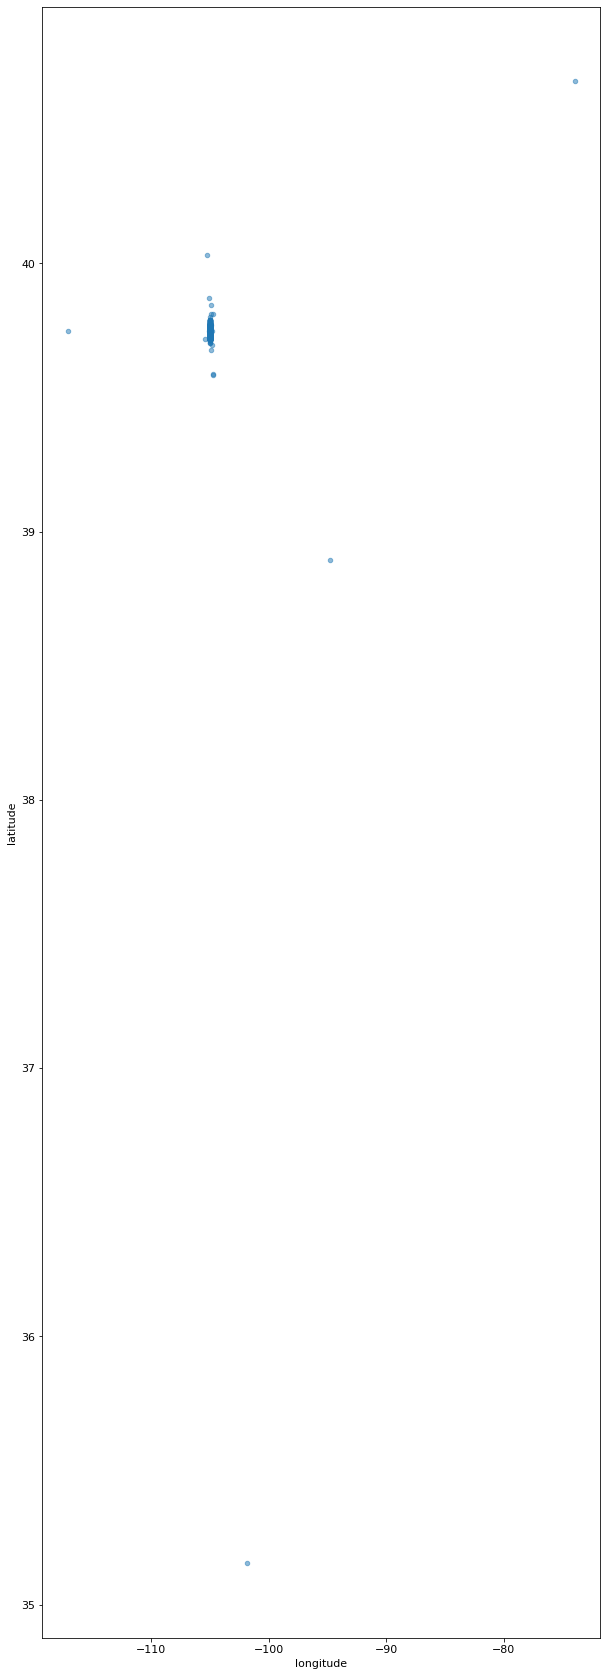

In [13]:
# plotting the results; note the outliers
df.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,30), alpha = .5)

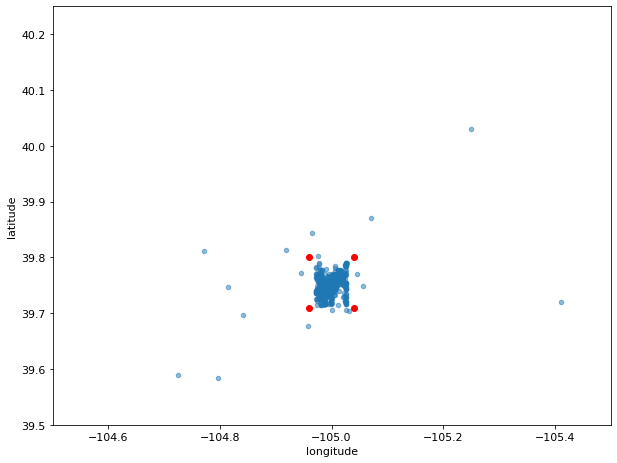

In [12]:
# plotting a zoomed in view of results; most points appear in the long/lat ranges of [-105.04, -104.96], [39.71, 39.80]
axes = df.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,30), alpha = .5)
plt.scatter(x=-105.04,y=39.80,color='r')
plt.scatter(x=-104.96,y=39.71,color='r')
plt.scatter(x=-105.04,y=39.71,color='r')
plt.scatter(x=-104.96,y=39.80,color='r')
axes.set_xlim(-104.5, -105.5)
axes.set_ylim(39.5,40.25)
axes.set_aspect('equal')

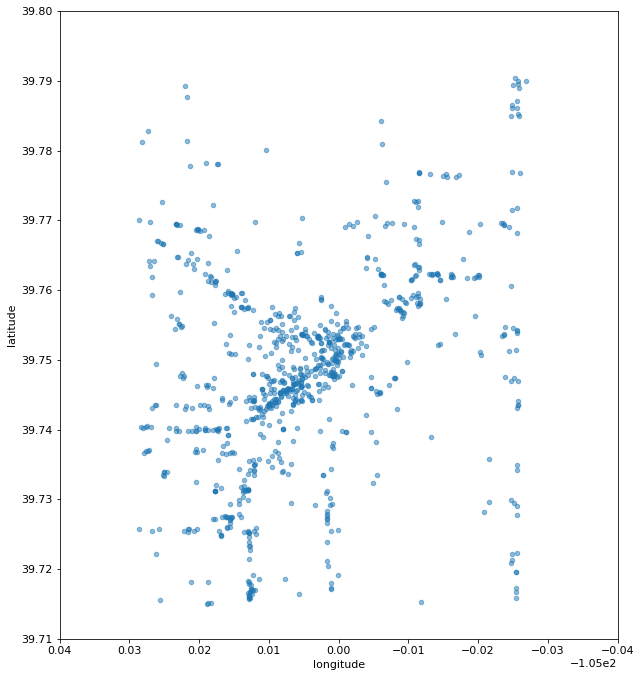

In [24]:
# plotting a more zoomed in view of results
axes = df.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,30), alpha = .5)
axes.set_xlim(-104.96, -105.04)
axes.set_ylim(39.71,39.80)
axes.set_aspect('equal')

In [4]:
#dropping datapoints outside of desired lat/ long window 
todrop = df[(df['latitude'] < 39.71) | (df['latitude'] > 39.80) | (df['longitude'] < -105.04) | (df['longitude'] > -104.96)]
print('Dropping:',len(todrop),'datapoints')
df.drop(todrop.index,inplace=True)

Dropping: 22 datapoints


In [22]:
# visually examining missing data
# looks like a few missing phone numbers, images, prices, address details (still have display address), and category
# really we only care about the missing prices and the one restaurant that has no category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 911
Data columns (total 30 columns):
alias               897 non-null object
display_phone       837 non-null object
distance            897 non-null float64
id                  897 non-null object
image_url           871 non-null object
is_closed           897 non-null bool
name                897 non-null object
phone               837 non-null float64
price               736 non-null object
rating              897 non-null float64
review_count        897 non-null int64
transactions        897 non-null object
url                 897 non-null object
address1            863 non-null object
address2            171 non-null object
address3            29 non-null object
city                897 non-null object
country             897 non-null object
display_address     897 non-null object
state               897 non-null object
zip_code            892 non-null float64
latitude            897 non-null float64
longitude     

In [5]:
# Creating a dataframe to count the number of restaurants in each category
df_categories_1 = pd.DataFrame(df['category_1_title'].value_counts())
df_categories_2 = pd.DataFrame(df['category_2_title'].value_counts())
df_categories_3 = pd.DataFrame(df['category_3_title'].value_counts())
df_categories_1.reset_index(inplace= True)
df_categories_2.reset_index(inplace= True)
df_categories_3.reset_index(inplace= True)
df_categories = pd.merge(df_categories_1,df_categories_2,on='index',how='outer')
df_categories = pd.merge(df_categories, df_categories_3,on='index',how='outer')
rename_columns = dict(index='category',category_1_title='sum_cat1',category_2_title='sum_cat2',category_3_title='sum_cat3')
df_categories.rename(columns=rename_columns,inplace=True)
df_categories.fillna(0, inplace=True)
df_categories['sum_total'] = df_categories['sum_cat1'] + df_categories['sum_cat2'] + df_categories['sum_cat3'] 
df_categories.sort_values(by='sum_total', ascending=False, inplace=True)

In [27]:
# Exploring depth of categories
print("Num Categories w/only 1 restaurant: "+str(len(df_categories[df_categories['sum_total'] == 1])))
print("Num Categories w/only 2 restaurants: "+str(len(df_categories[df_categories['sum_total'] == 2])))
print("Num Categories w/more than 2 restaurants: "+str(len(df_categories[df_categories['sum_total'] > 2])))

Num Categories w/only 1 restaurant: 44
Num Categories w/only 2 restaurants: 24
Num Categories w/more than 2 restaurants: 88


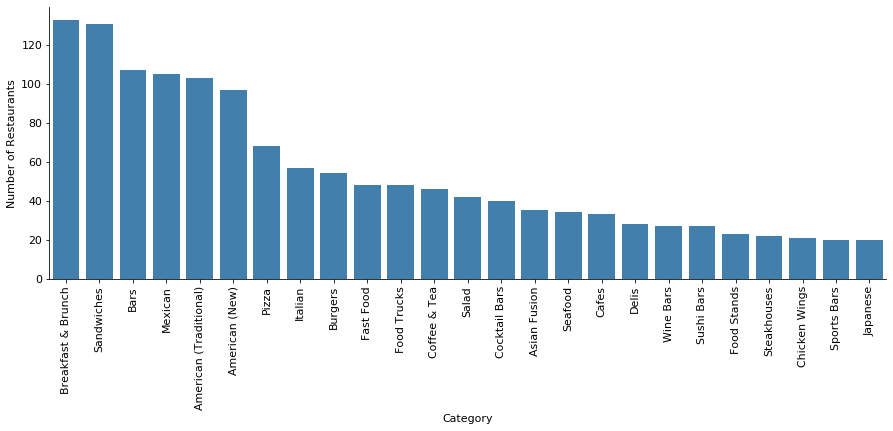

In [28]:
# Examining categories with 20 or more restaurants
plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(figsize=(15,5))
data = df_categories[df_categories['sum_total'] > 19]
sns.barplot(data=data,x='category',y='sum_total',color='#3182bd')
axes.set_xlabel('Category')
axes.set_ylabel('Number of Restaurants')
axes.set_xticklabels(data['category'],rotation=90)
sns.despine()

In [75]:
# visually examinging category labels
df[['name','category_1_title','category_2_title','category_3_title']].sample(10)

,name,category_1_title,category_2_title,category_3_title
801,Raquelitas Tortillas,Mexican,NaN,NaN
883,Subway Restaurants,Sandwiches,NaN,NaN
485,Huckleberry Roasters,Cafes,Coffee Roasteries,Wholesale Stores
666,Bonanno Brothers,Pizza,NaN,NaN
690,Hotbox Roasters,Coffee Roasteries,Cafes,NaN
886,Subway Restaurants,Sandwiches,NaN,NaN
587,Snarf's Sandwiches,Sandwiches,Gluten-Free,Breakfast & Brunch
683,Saba's Ethiopian Food,Food Trucks,Ethiopian,NaN
101,Steuben's Uptown,Diners,Breakfast & Brunch,Cocktail Bars
783,Aramark Concessionaire,Food Stands,NaN,NaN


In [77]:
# defining broader category labels
cat_list = df_categories['category'].tolist()

bars = ['Bars','Beer Bar','Beer Gardens','Beer, Wine & Spirits','Breweries','Brewpubs','Champagne Bars','Cocktail Bars',
       'Distilleries','Dive Bars','Gastropubs','Gay Bars','Irish Pub','Pubs','Sports Bars','Whiskey Bars','Wine Bars','Wine Tasting Room',
       'Wineries']
asian = ['Asian Fusion','Chinese','Conveyor Belt Sushi','Dim Sum','Filipino','Hawaiian','Hot Pot','Izakaya','Japanese',
        'Japanese Curry','Korean','Mongolian','Poke','Ramen','Sushi Bars','Szechuan','Thai','Vietnamese']
american = ['American (New)','American (Traditional)','Barbeque','Burgers','Cheesesteaks','Comfort Food','Delis','Diners',
           'Hot Dogs','Pizza','Pretzels','Sandwiches','Soul Food','Southern','Steakhouses']
carribean = ['Cajun/Creole','Caribbean','Cuban','Puerto Rican']
chicken = ['Chicken Shop','Chicken Wings']
breakfast = ['Bagels','Bakeries','Breakfast & Brunch','Cafes','Coffee & Tea','Coffee Roasteries','Creperies','Donuts',
             'Tea Rooms','Waffles']
health = ['Acai Bowls','Juice Bars & Smoothies','Kombucha','Salad','Wraps']
latin = ['Argentine','Brazilian','Empanadas','Latin American','Mexican','Peruvian','Salvadoran','Tacos','Tex-Mex','Venezuelan']
european = ['Basque','British','German','Greek','Italian','French','Mediterranean','Modern European','Pasta Shops','Polish',
           'Portuguese','Spanish','Irish']
dessert = ['Desserts','Gelato','Ice Cream & Frozen Yogurt']
african = ['Ethiopian']
middle_east = ['Falafel','Lebanese','Middle Eastern','Persian/Iranian']
indian = ['Indian']

venues = ['Aquariums','Arcades','Bed & Breakfast','Bowling','Butcher','Caterers','Comedy Clubs','Community Service/Non-Profit',
          'Dance Clubs','Dinner Theater','Eatertainment','Escape Games','Hotels','Hookah Bars','Jazz & Blues', 'Karaoke','Music Venues',
         'Party & Event Planning','Performing Arts','Pool Halls','Social Clubs','Tabletop Games','Venues & Event Spaces','Yoga']
rest_style = ['Buffets','Cafeteria','Fast Food','Food Court','Food Stands','Food Trucks','Grocery','Lounges',
          'Convenience Stores','Pop-Up Restaurants','Restaurants','Street Vendors','Tapas Bars','Tapas/Small Plates',
            'Public Markets','Seafood Markets','Smokehouse','Wholesale Stores']
dietary_type = ['Gluten-Free','Live/Raw Food','Meat Shops','Vegan','Vegetarian']
food_type = ['Fruits & Veggies','Noodles','Seafood','Soup']
fast_food = ['Fast Food']

In [84]:
# adding broader categories to the dataframe
def categorize(x, lst):
    if (x[0] in lst) or (x[1] in lst) or (x[2] in lst):
        return 1
    else:
        return 0

df['bars'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[bars])
df['asian'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[asian])
df['american'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[american])
df['carribean'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[carribean])
df['chicken'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[chicken])
df['breakfast_coffee'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[breakfast])
df['health'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[health])
df['latin'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[latin])
df['european'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[european])
df['dessert'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[dessert])
df['african'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[african])
df['middle_eastern'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[middle_east])
df['indian'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[indian])
df['fast_food'] = df[['category_1_title','category_2_title','category_3_title']].apply(categorize, axis = 1,args=[fast_food])

In [30]:
# Examining price points; recall there is also one nan value
df['price'].value_counts()

$$      390
$       294
$$$      46
$$$$      6
Name: price, dtype: int64

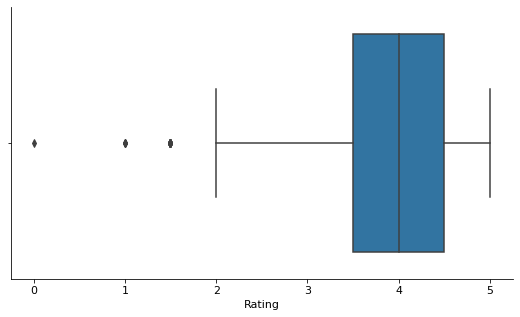

In [31]:
# Examining ratings; note the three outliers
plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(figsize=(9,5))
sns.boxplot(x="rating", data=df)
axes.set_xlabel('Rating')
sns.despine()

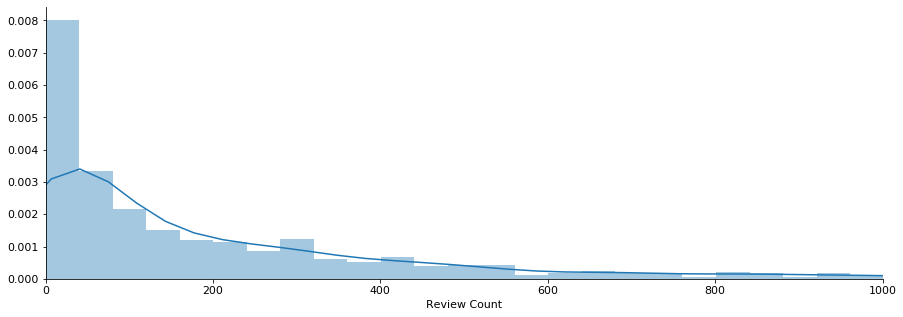

In [32]:
# Examining review count; note there is a long tail, many outliers well above 1000 reviews
plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(figsize=(15,5))
sns.distplot(df["review_count"], bins = 100)
axes.set_xlabel('Review Count')
axes.set_xlim(0,1000)
sns.despine()

In [33]:
#loading the denver map
denver_img = mpimg.imread(r'C:\Users\MainUser\Desktop\Denver_map.png') #long/ lat dims: -105.04, -104.96, 39.7, 39.8

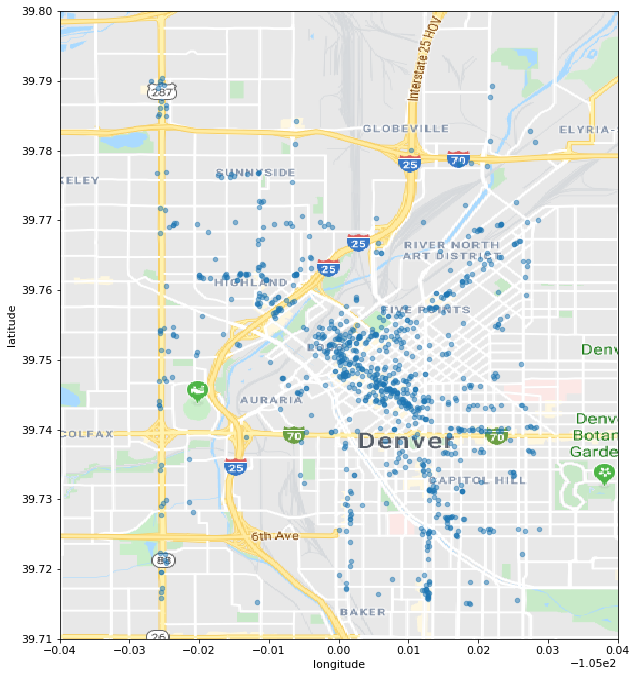

In [34]:
#examining the large denver map
plt.rcParams.update({'font.size': 11})
axes = df.plot(kind='scatter', x='longitude',y='latitude',figsize=(10,30), alpha = .5)
axes.set_xlim(-105.04, -104.96)
axes.set_ylim(39.71,39.8)
plt.imshow(denver_img, extent=[-105.04, -104.96, 39.7, 39.8])

In [35]:
df.to_csv(path_or_buf=r'C:\Users\MainUser\Desktop\Restaurants_Cleaned.csv', index=False)